# Diabetes Prediction

### My Understanding of Problem Statement:

- From a given diabetes dataset, we have to build a model which should be able to predict whether or not a person has diabetes.\
- From a brief overview of dataset we have features like pregnancies, glucose level, BP level, Insulin level, patient's BMI among other features which should rightly enable us to predict whether or not a person has diabetes.
- So, upfront we are going to do diabetes prediction and it's going to be a supervised classification problem with binary outcome.

Let's get started...

## Importing Dependencies

In [1]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from warnings import filterwarnings
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np



pd.pandas.set_option('display.max_columns',None)
sns.set_theme()
filterwarnings('ignore')
%matplotlib inline

## Understanding the dataset and addressing inconsistencies if any

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.index.duplicated().sum()

0

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Summary Statistics

- No missing values in any of the columns;
- Ranges are diverse and might need scaling which we would decide upon further analysis
- Minimum values in almost most of the columns are 0 which needs some attention as it can't be 0 when it comes to BP, Glucose levels and all
- SD is minimum to moderate.
- Mean in few columns shows that the data might be skewed mostly left and in few columns right and not many features with normal distribution.

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

As we suspect some inconsistency in the values as we have 0 in many features which can't be the case... Let's check the unique values in all features and see whether we can observe anything fishy...

In [9]:
def unique_values(df):
    for col in df.columns:
        unique_vals = df[col].nunique()
        print(f"{col}: {unique_vals} unique values")
        if unique_vals < 600:
            print()
            print(df[col].unique())
        print("\n", 55 * "_", "\n")

In [10]:
unique_values(df)

Pregnancies: 17 unique values

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

 _______________________________________________________ 

Glucose: 136 unique values

[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

 _______________________________________________________ 

BloodPressure: 47 unique values

[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38

In [11]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Observations:**

- We can have any number of pregnancy and it seems well within the frame(0 - 17) observing the unique values.
- Age and DiabetesPedigreeFunction columns don't have any values as zero. So, they look good.
- SkinThickness we can assume them to be zero. But in this case we have no other values like 1-6 as thickness values and only other values within 10 are 7 and 8 and most other values seems to well above this range and the maximum we can notice is 99. So, we might have to address these by using some imputation techniques.
- Glusose, BP, Insulin and BMI features can never be 0 unless and until the specified person is died and his/her measures are noted. But, this won't be the case mostly as we won't collect these data from a person who's dead. So, we probably need to do some imputation in these cases as well.
- Our outcome feature need to have 0 as this is a binary classification problem. So, that's not an issue.

We will do these imputations with either mean or median or some other technique after we see the distribution of each of these columns as some might have outliers and mean might be skewed.

## Outlier Check

In [12]:
def count_outliers(df):
    outliers = {}
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        num_outliers = len(df[(df[col] > upper_bound) | (df[col] < lower_bound)])
        percent_outliers = (num_outliers / len(df)) * 100
        outliers[col] = {'count': num_outliers, 'percent': percent_outliers}
    return outliers

In [13]:
outliers = count_outliers(df)
for col, info in outliers.items():
    print(f"Column: {col}")
    print(f"Count of outliers: {info['count']}")
    print(f"Percentage of outliers: {round(info['percent'], 2)}%")
    print()

Column: Pregnancies
Count of outliers: 4
Percentage of outliers: 0.52%

Column: Glucose
Count of outliers: 5
Percentage of outliers: 0.65%

Column: BloodPressure
Count of outliers: 45
Percentage of outliers: 5.86%

Column: SkinThickness
Count of outliers: 1
Percentage of outliers: 0.13%

Column: Insulin
Count of outliers: 34
Percentage of outliers: 4.43%

Column: BMI
Count of outliers: 19
Percentage of outliers: 2.47%

Column: DiabetesPedigreeFunction
Count of outliers: 29
Percentage of outliers: 3.78%

Column: Age
Count of outliers: 9
Percentage of outliers: 1.17%

Column: Outcome
Count of outliers: 0
Percentage of outliers: 0.0%



The dataset doesn't seem to have much outlier and it suggests the use of even linear and distance based models after scaling and other preprocessing if any... As there's no alarming amount of outliers and as this is medical dataset, where outliers need due attention we would keep them as it is and do scaling if needed and see how the model performs...

## Splitting Dataset into Discrete and Continuous to Handle them seperately

- `Pregnancies / No. of Pregnancies` and `Age` features can be considered as `discrete`.
- `Outcome` column is our target feature which is `binary` and that doesn't need to be classified among discrete or continuous.
- `All other features` can be considered `continuous`.

In [14]:
discrete_vars = ['Pregnancies', 'Age']

continuous_vars = [col for col in df.columns if col not in discrete_vars and col != 'Outcome']

In [15]:
discrete_vars

['Pregnancies', 'Age']

In [16]:
continuous_vars

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction']

## Handling Discrete Features

In [17]:
for column in discrete_vars:
    print(column, ':\n')
    print(df[column].unique())
    print("\n", 55 * "_", "\n")

Pregnancies :

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

 _______________________________________________________ 

Age :

[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81 64 70 68]

 _______________________________________________________ 



(0.0, 20.0)

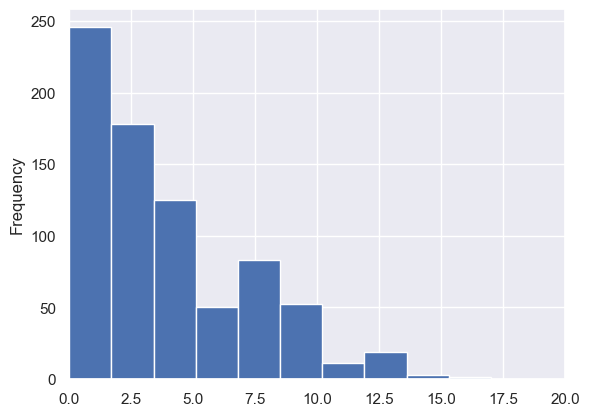

In [18]:
df['Pregnancies'].plot.hist()
plt.xlim(0, 20)

As we observe here as the pregnancy count increases, the frequency decreases and it is hard for some linear model or distance based model to process these kinda lognormal distribution... So, we probably have to pick a tree based model.. Let's see what to do later on after observing all other trends...

**Note:** It is important to note that we can't exclude those extreme values as pregnancy count can be crucial at times in deciding whether or not a patient has diabetes. Also the common notion in medical field is that outliers and extreme values are the point of importance and we have to stress on those without removing them...

<Axes: ylabel='Frequency'>

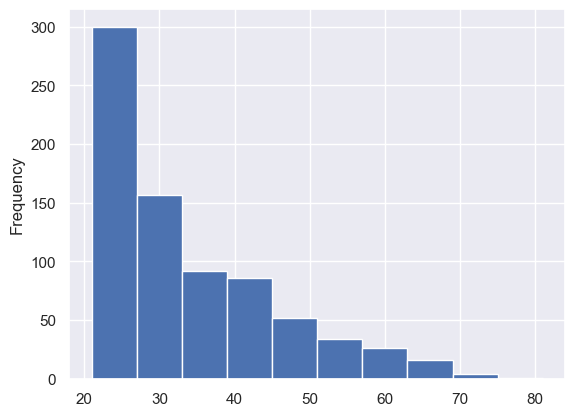

In [19]:
df['Age'].plot.hist()

In [20]:
for column in discrete_vars:
    if column != 'age':
        print(df[column].value_counts())
        print("\n", 55 * "_", "\n")

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

 _______________________________________________________ 

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

 _______________________________________________________ 



The test seems to be conducted mostly on people in the age range of 20 - 45 and less old age people and the dataset might be imbalanced as mostly old age people will have the diabetes though these days younger generation getting diabetes. We can't clip these age as well as it is one of the crucial factor in deciding whether or not a patient has diabetes... We don't have normal distribution here as well and we will see whether we can address this with some transformation or not...

In [21]:
def get_column_ranges(df):
    ranges = {}
    for column in discrete_vars:
        column_min = df[column].min()
        column_max = df[column].max()
        column_range = column_max - column_min
        ranges[column] = [column_min, column_max, column_range]
    return ranges

In [22]:
ranges = get_column_ranges(df)

for column, values in ranges.items():
    print(f"Column: {column}")
    print(f"Minimum: {values[0]}, Maximum: {values[1]}, Range: {values[2]}")
    print()

Column: Pregnancies
Minimum: 0, Maximum: 17, Range: 17

Column: Age
Minimum: 21, Maximum: 81, Range: 60



Range shows that these two needs to be scaled down, especially the age column... We will do it later on after the split...

## Handling Continuous Features

In [23]:
continuous_vars

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction']

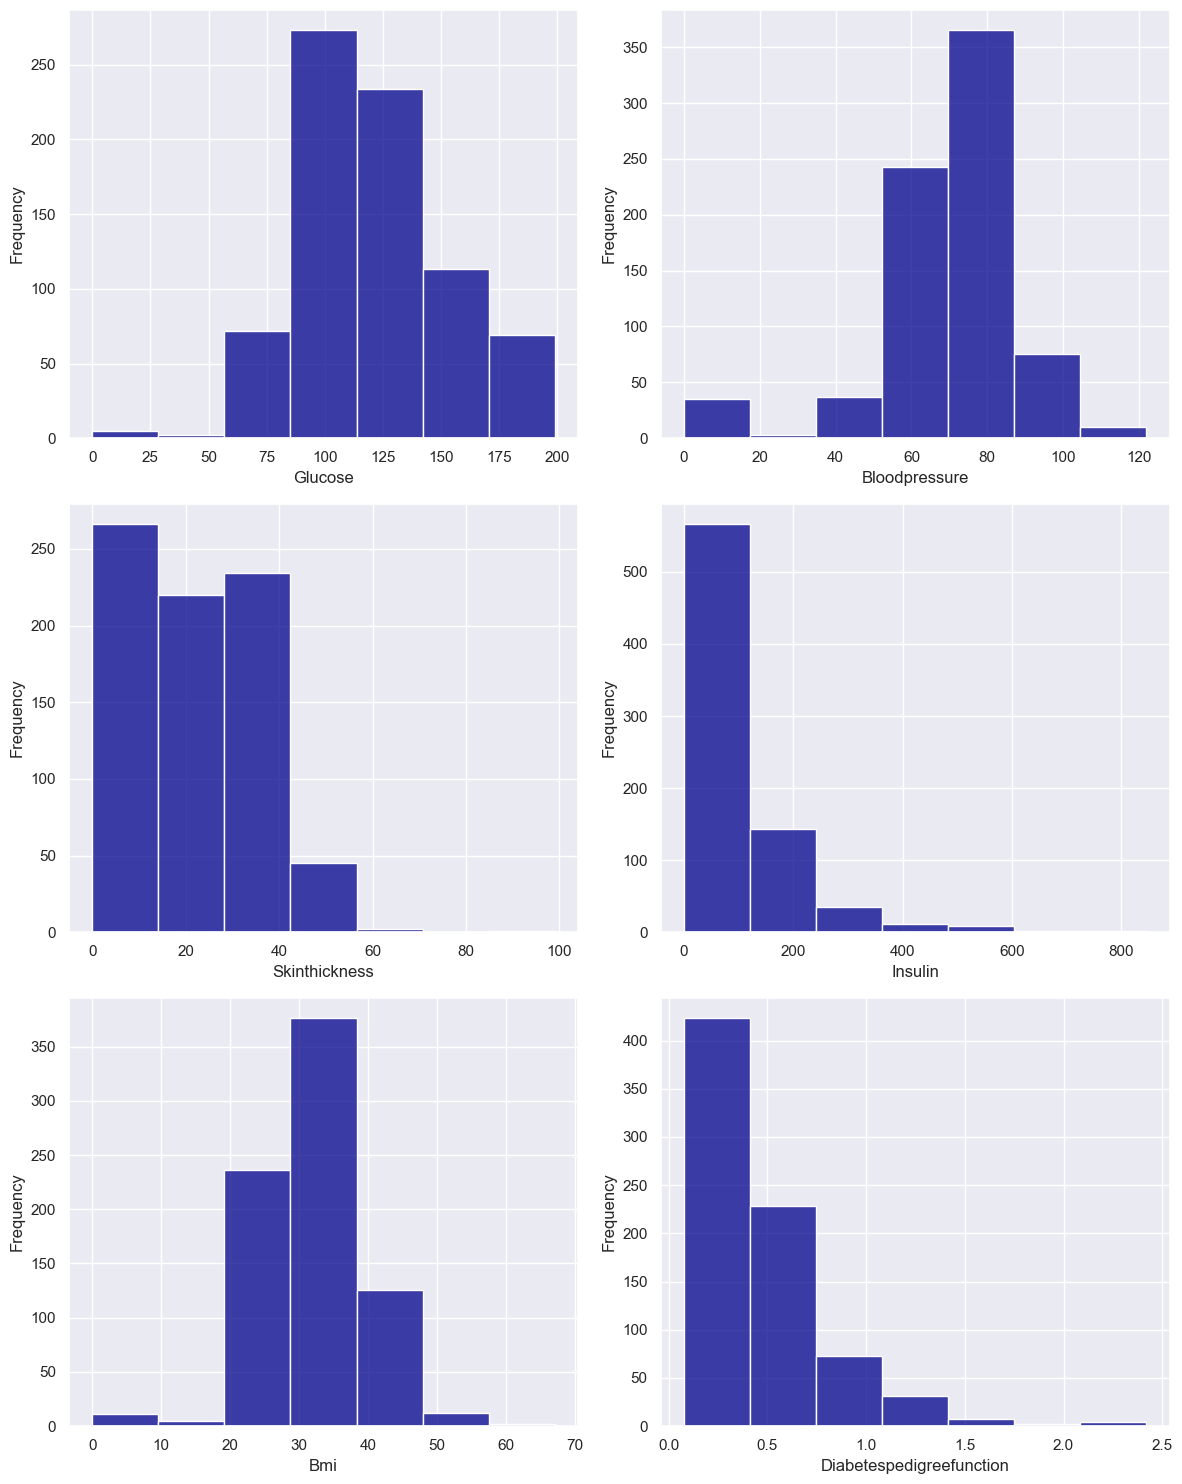

In [24]:
num_plots = len(continuous_vars)

num_rows = (num_plots + 1) // 2  # Number of rows for subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

for i, feature in enumerate(continuous_vars):
    data = df.copy()

    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.histplot(data[feature], ax=ax, bins=7, color='darkblue')
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel("Frequency")

# Remove any empty subplots
if num_plots < num_rows * 2:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.show()

As we have already observed no alarming amount of outliers and here few variables seems to hold close to normal distribution and few other are skewed mostly because of the fact that we have 0s where there shouldn't be... So, we have to consider the 0s as null values and have to do some imputation to handle those...

As we have observed that there's no alarming amount of outliers we can simply use mean for imputation instead of going for some complex thing...

In [25]:
for col in df.columns:
    if col not in (discrete_vars + ['DiabetesPedigreeFunction', 'Outcome']):
        df[col].replace(0, np.mean(df[col]), inplace=True)

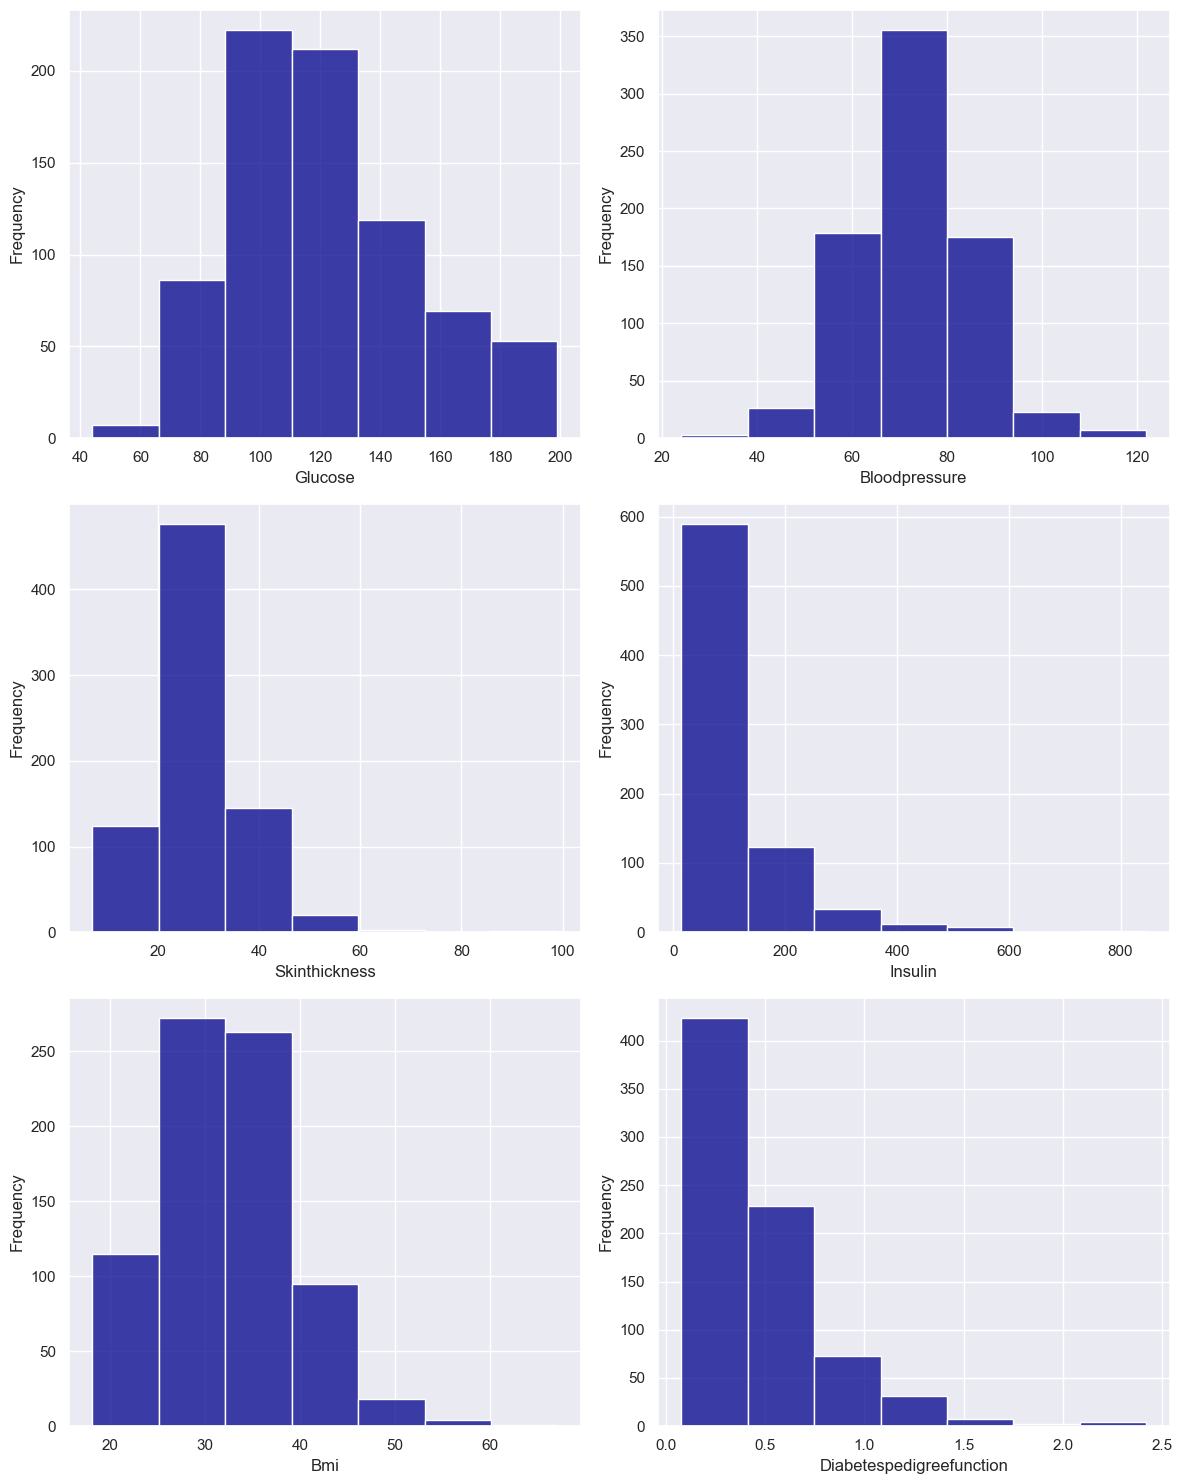

In [26]:
num_plots = len(continuous_vars)

num_rows = (num_plots + 1) // 2  # Number of rows for subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

for i, feature in enumerate(continuous_vars):
    data = df.copy()

    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.histplot(data[feature], ax=ax, bins=7, color='darkblue')
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel("Frequency")

# Remove any empty subplots
if num_plots < num_rows * 2:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.show()

Now as we see, zeros has got replaced with mean and distributions looks pretty much fine and its just that we need to do some transformation to give them as input to linear and distance based models...

In [27]:
def get_column_ranges(df):
    ranges = {}
    for column in continuous_vars:
        column_min = df[column].min()
        column_max = df[column].max()
        column_range = column_max - column_min
        ranges[column] = [column_min, column_max, column_range]
    return ranges

In [28]:
ranges = get_column_ranges(df)

for column, values in ranges.items():
    print(f"Column: {column}")
    print(f"Minimum: {values[0]}, Maximum: {values[1]}, Range: {values[2]}")
    print()

Column: Glucose
Minimum: 44.0, Maximum: 199.0, Range: 155.0

Column: BloodPressure
Minimum: 24.0, Maximum: 122.0, Range: 98.0

Column: SkinThickness
Minimum: 7.0, Maximum: 99.0, Range: 92.0

Column: Insulin
Minimum: 14.0, Maximum: 846.0, Range: 832.0

Column: BMI
Minimum: 18.2, Maximum: 67.1, Range: 48.89999999999999

Column: DiabetesPedigreeFunction
Minimum: 0.078, Maximum: 2.42, Range: 2.342



As we see except DiabetesPedigreeFunction all other features looks like they need some scaling... It's better we do scaling over all features...

## Model Building

### Dependent, Independent and Train, Test Split

In [29]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [30]:
# As we have just 700 instances we will go with just 2 splits(80:20) and no seperate validation split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


### Scaling

In [31]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test_scaled)

<Axes: title={'center': 'Imbalance Check Over Target Variable'}>

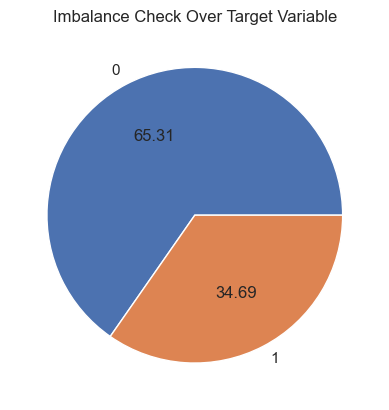

In [32]:
y_train.value_counts().plot.pie(autopct='%.2f', label='', title = 'Imbalance Check Over Target Variable')

As we notice here, there seems to be a bit of class imbalance in train set and we would see which sampling technique would be appropriate by looping through few models and fix one among it...

In [33]:
important_models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier()]

imbalance_techniques = [('Undersampling', RandomUnderSampler()), ('Oversampling', RandomOverSampler()), ('SMOTE', SMOTE())]

results_df = pd.DataFrame(columns=['Model', 'Imbalance Technique', 'Accuracy', 'F1-Score'])

for imbalance_name, imbalance_technique in imbalance_techniques:

    X_train_resampled, y_train_resampled = imbalance_technique.fit_resample(X_train_scaled, y_train)

    for model in important_models:

        model.fit(X_train_resampled, y_train_resampled)
        
        y_train_pred = model.predict(X_train_resampled)
        y_pred = model.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        results_df = results_df.append({
            'Model': model.__class__.__name__,
            'Imbalance Technique': imbalance_name,
            'Accuracy': accuracy,
            'F1-Score': f1,
        }, ignore_index=True)

results_df

,Model,Imbalance Technique,Accuracy,F1-Score
0,LogisticRegression,Undersampling,0.772727,0.776752
1,RandomForestClassifier,Undersampling,0.785714,0.789509
2,KNeighborsClassifier,Undersampling,0.727273,0.732930
3,LogisticRegression,Oversampling,0.818182,0.821734
4,RandomForestClassifier,Oversampling,0.785714,0.786910
5,KNeighborsClassifier,Oversampling,0.746753,0.752029
6,LogisticRegression,SMOTE,0.785714,0.789152
7,RandomForestClassifier,SMOTE,0.766234,0.767925
8,KNeighborsClassifier,SMOTE,0.740260,0.745648


Oversampling and SMOTE seems to perform better. So, lets stick to Oversampling here as it is more reliable...

In [34]:
over_sampler = RandomOverSampler()

X_train_res, y_train_res = over_sampler.fit_resample(X_train_scaled, y_train)

<Axes: title={'center': 'Imbalance Check Over Target Variable'}>

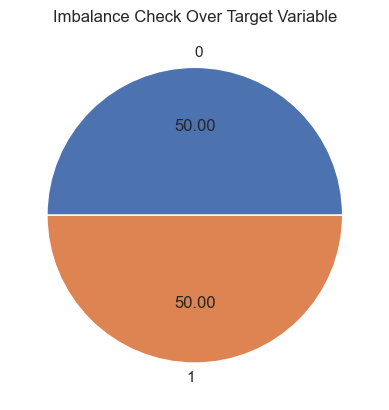

In [35]:
y_train_res.value_counts().plot.pie(autopct = '%.2f', label = '', title = 'Imbalance Check Over Target Variable')

It is appropriate to use tree based model directly but let's loop through all possible models and find the best one...

In [38]:
classification_models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier(),
    XGBClassifier(),
    SVC(),
    KNeighborsClassifier()
]

cls_results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score'])

for model in classification_models:

    model.fit(X_train_res, y_train_res)
    
    y_test_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    
    cls_results_df = cls_results_df.append({
                           'Model': model.__class__.__name__,
                           'Accuracy': accuracy,
                           'F1-Score': f1_test,
                          }, ignore_index=True)

cls_results_df.sort_values(by='F1-Score', ascending=False, inplace=True)
cls_results_df

,Model,Accuracy,F1-Score
0,LogisticRegression,0.798701,0.802266
4,GradientBoostingClassifier,0.792208,0.795339
2,RandomForestClassifier,0.779221,0.780066
7,SVC,0.766234,0.769757
5,HistGradientBoostingClassifier,0.766234,0.767128
3,AdaBoostClassifier,0.753247,0.756416
6,XGBClassifier,0.753247,0.752196
8,KNeighborsClassifier,0.720779,0.726523
1,DecisionTreeClassifier,0.681818,0.676439


I have observed Log reg underfitting and as we have outliers gradient booster would be the appropriate one to go with...

In [39]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.001],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 3, 5],
    'n_estimators': [50, 200, 250, 350]
}

gb_classifier = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score (F1): ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200}
Best Score (F1):  0.8566349501344716


In [45]:
best_params = grid_search.best_params_

cls_model = GradientBoostingClassifier(random_state=42, **best_params)

cls_model.fit(X_train_res, y_train_res)

y_train_pred = model.predict(X_train_res)
y_test_pred = cls_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1_test}")

Accuracy: 0.7402597402597403
F1-Score: 0.7421388522853525


In [48]:
print(f'Confusion Matrix:\n\n {confusion_matrix(y_test, y_test_pred)}')

Confusion Matrix:

 [[77 22]
 [18 37]]


As we can observe we have done our best to get to this point in short span of time and got close to 75% accuracy and F1-score.

**What else can we do to improve the model?**

- We can do some feature engineering and extract new features if possible.
- We can try out some transformation techniques like power, sqrt or other ones.
- We can do some feature selection using correlation matrix.

In [51]:
correlation = df.corr()

num_features_greater_than_0_5 = sum((correlation > 0.5).sum() > 1)

total_features = len(df.columns)
percentage_greater_than_0_5 = (num_features_greater_than_0_5 / total_features) * 100

print(f"Number of features with correlation > 0.5: {num_features_greater_than_0_5}")
print(f"Percentage of features with correlation > 0.5: {percentage_greater_than_0_5:.2f}%")

Number of features with correlation > 0.5: 4
Percentage of features with correlation > 0.5: 44.44%


In [52]:
correlation>0.5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,True,False,False,False,False,False,False,True,False
Glucose,False,True,False,False,False,False,False,False,False
BloodPressure,False,False,True,False,False,False,False,False,False
SkinThickness,False,False,False,True,False,True,False,False,False
Insulin,False,False,False,False,True,False,False,False,False
BMI,False,False,False,True,False,True,False,False,False
DiabetesPedigreeFunction,False,False,False,False,False,False,True,False,False
Age,True,False,False,False,False,False,False,True,False
Outcome,False,False,False,False,False,False,False,False,True


The model might not be getting more accuracy because of the above reason that less no. of features being highly correlated with each other so some data with high correlation could be collected from the source to improve the model...